In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the uploaded CSV file
file_path = 'final_result.csv'
df = pd.read_csv(file_path)

# Check the first few rows to understand the structure
df.head()

,Name,Query,Persona Owner's feedback to query,BERTScore F1,Ad_Content,Simulated Feedback,Simulated Justification,Persona Owner's feedback,Reason
0,Yuyang Zeng,1. Ergonomic Desk Chair for Students,3,0.8267,Classic traditional executive chair from the O...,0,"The user, Yuyang Zeng, is a student looking fo...",0,NaN
1,Yuyang Zeng,2. Smart Basketball Training Equipment,3,0.8636,Champion Sports Fitpro Training & Exercise 16....,0,The ad content is about a training and exercis...,0,NaN
2,Yuyang Zeng,3. Portable Soccer Goal Net,3,0.8755,Volleyball/Badminten Water toys by Poolmaster ...,0,"The ad is for a volleyball/badminton net, spec...",0,NaN
3,Yuyang Zeng,4. Men's Streetwear Fashion Jackets,3,0.8619,You or your grandparents have likely already s...,0,The ad content is focused on a 70s-themed chil...,0,NaN
4,Yuyang Zeng,5. Compact Travel Toiletry Bag,3,0.8555,This Travelon Toiletry Kit makes traveling wit...,1,"The user, Yuyang Zeng, has a stated interest i...",1,NaN


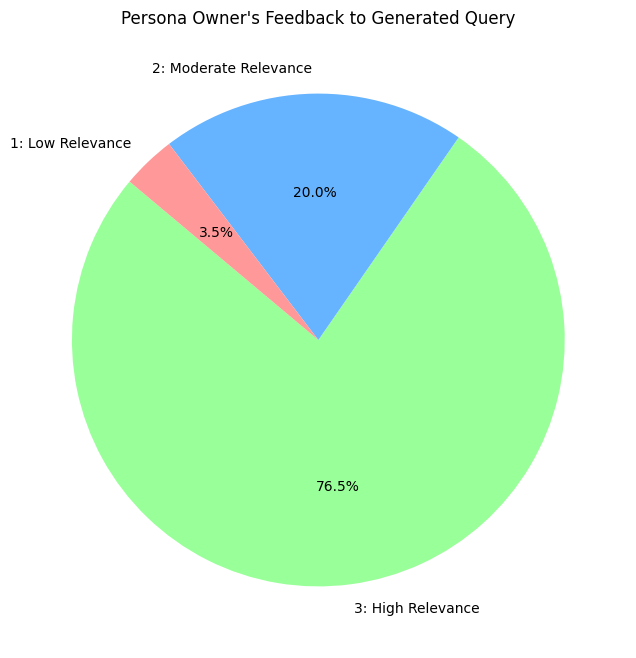

In [12]:
# Extract the 'Persona Owner's feedback to query' column for plotting
feedback_column = df["Persona Owner's feedback to query"]

# Count the occurrences of each feedback value
feedback_counts = feedback_column.value_counts()


# Define labels with descriptions
labels = [
    "3: High Relevance",
    "2: Moderate Relevance",
    "1: Low Relevance"
]

# Plot a pie chart with descriptive labels
plt.figure(figsize=(8, 8))
plt.pie(
    feedback_counts,
    labels=labels,
    colors = ['#99ff99','#66b3ff','#ff9999'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Persona Owner's Feedback to Generated Query")
plt.show()


In [14]:
# Calculate the average BERTScore F1
average_bertscore_f1 = df['BERTScore F1'].mean()
# print the f1 score with 4 digits
print(f"Average BERTScore F1: {average_bertscore_f1:.4f}")

Average BERTScore F1: 0.8692


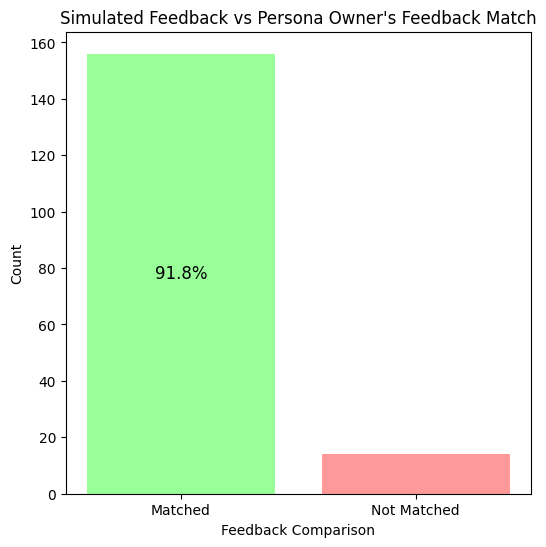

91.76470588235294

In [22]:
# Calculate the percentage of matches between Simulated Feedback and Persona Owner's Feedback
matches = (df["Simulated Feedback"] == df["Persona Owner's feedback"]).sum()
total_feedback = len(df)
match_percentage = (matches / total_feedback) * 100

# Create a bar chart to represent the match percentage
plt.figure(figsize=(6, 6))
plt.bar(["Matched", "Not Matched"], [matches, total_feedback - matches], color=['#99ff99','#ff9999'])
plt.title("Simulated Feedback vs Persona Owner's Feedback Match")
plt.ylabel("Count")
plt.xlabel("Feedback Comparison")
plt.text(0, matches / 2, f"{match_percentage:.1f}%", ha='center', va='center', color='black', fontsize=12)
plt.show()

match_percentage